# Chapter 08. 선형회귀의 심화
## 01. 경사하강법의 종류
- 선형회귀의 기초에서 최소자승법(최소제곱법)과 경사하강법에 대해서 배웠지만, 더 깊게 알아야 하는 알고리즘은 **경사하강법 (Gradient Descent)**
    - 현재 머신러닝의 핵심이라고 할 수 있는 딥러닝의 기본이 되는 알고리즘이 경사하강법이기 때문
    - 최근에 좋은 성능을 내는 거의 모든 알고리즘이 경사하강법을 기본으로 하고 있음

### 1 - 전체 - 배치 경사하강법
- 처음 배운 경사하강법과 실제 데이터를 사용한 경사하강법에는 조금 차이가 있음
    - 처음 배운 경사하강법은 다음 수식과 같이 하나의 값에 대한 경사도(gradient)를 구한 다음 값들을 업데이트 함
        - $x_{new} = x_{old} - \alpha \times (2x_{old})$
    - 하지만 데이터를 사용하여 실제 매개변수를 업데이트하면 다음 수식과 같이 $\sum_{}$ 기호를 포함하여 경사도를 반영
        - 각 데이터의 경사도를 모두 더해 하나의 값으로 가중치를 업데이트 하는 과정
            - **전체 - 배치 경사하강법(Full - Batch Gradient Descent)**
            - 모든 데이터를 한 번에 입력하는 방식
            - $\frac{\partial J}{\partial w_0} = \frac{1}{m} \displaystyle\sum_{i = 1}^m (w_ix^{(i)} + w_0 - y^{(i)})$
            - $\frac{\partial J}{\partial w_1} = \frac{1}{m} \displaystyle\sum_{i = 1}^m (w_ix^{(i)} + w_0 - y^{(i)})x^{(i)}$
- 일반적으로 선형회귀에서 특별한 의미 없이 경사하강법을 사용한다고 할 때 바로 전체 - 배치 경사하강법을 의미
    - 배치(batch) : 하나의 데이터셋
    - 전체 - 배치(full - batch) : 모든 데이터를 한 번에 사용하여 가중치를 업데이트하는 것

- 데이터를 하나씩 사용하지 않고 전체 데이터의 경사도 평균을 취해 가중치를 업데이트 함
    - 점을 한 개씩 사용하여 가중치를 업데이트하면 시간이 오래 걸림
    - 시작점이 어디인지에 따라 그래프 전체에서 최솟점을 찾지 못 하고 부분최솟점에 최적점이 위치하게 됨
        - **지역 최적화(local optimum)**

- 전체 - 배치 경사하강법은 하나의 데이터를 사용하는 일반적인 경사하강법과 비교하여 다음과 같은 특징을 가짐
    - **업데이트 횟수 감소** : 가중치의 업데이트 횟수가 줄어들면서 계산상 효율성이 올라감
    - **안정적인 비용함수 수렴** : 비교적 안정적으로 비용함수가 수렴, 모든 값의 평균을 구하기 때문에 일반적으로 경사하강법이 갖는 지역 최적화 문제를 만날 가능성도 있음
    - **업데이트 속도 증가** : 데이터가 백만 단위 이상을 넘어가면 하나의 머신에서는 처리가 불가능(메모리 문제 발생 가능)하지만 전체 - 배치 경사하강법과 같이 대규모 데이터셋을 한 번에 처리하면 모델의 매개변수에 대한 업데이트 속도에 문제 발생이 적어짐

### 2 - 확률적 경사하강법
- 확률적 경사하강법(Stochastic Gradient Descent, SGD)
- 지역 최적화의 문제를 극복하기 위해 SGD에서는 데이터셋에 있는 값들을 순차적으로 추출하여 미분하는 것이 아닌 학습용 데이터에서 샘플들을 랜덤하게 뽑아서 사용

- 기본적으로 아래와 같은 순서로 알고리즘이 일어남
        Procedure SGD
            shuffle(X)
            for i in number of X do
                $\theta_j = \theta_j - \alpha (\hat{y}^{(i)} - y^{(i)}) {x_j}^{(i)}$
            end for
        end procedure
    - 특별히 다른 점은 알고리즘의 2행처럼 대상이 되는 데이터를 섞은(shuffle) 후, 일반적인 경사하강법 과정에서 데이터를 한 개씩 추출하여 가중치 업데이트에 사용

- SGD의 장점
    - 빈번한 업데이트를 하기 때문에 데이터 분석가 입장에서는 모델의 성능 변화를 빠르게 확인 가능
    - 데이터의 특성에 따라 훨씬 더 빠르게 결과값 도출 가능
    - 지역 최적화를 회피하는데 유용
- SGD의 단점
    - 대용량 데이터를 사용하여 SGD에 적용하는 경우 시간이 매우 오래 걸리는 문제 발생
    - 결과의 마지막 값을 확인하기 어려움
        - 흔히 '튀는 현상'이라고 불림
        - 비용함수의 값이 줄어들지 않고 계속 변화하는 현상 발생
            - 이럴 경우 정확히 언제 루프가 종료되는지 알 수 없어 판단이 어려워짐

### 3 - 미니 - 배치 경사하강법
- 미니 - 배치 경사하강법(Mini - Batch Gradient Descent) 또는 미니 - 배치 SGD(Mini - Batch SGD)
- 전체 - 배치와는 다르게 미니 - 배치 SGD는 모든 데이터를 입력하지 않고 데이터의 일부분만 입력해서 해당 값들의 경사도 평균을 구해 가중치를 업데이트하는 방식
- 또한 단순히 데이터의 일부분만 입력하는 게 아닌 데이터를 랜덤하게 섞어서 업데이트 할 때 사용함 (이름에 SGD가 붙는 이유)
- 데이터를 미니 - 배치 방식으로 입력하면서 섞음
- 미니 - 배치 SGD는 경사하강법 중 가장 일반적인 방식, 앞으로 사용할 기법의 표준

- 전체 - 배치 SGD, 미니 - 배치 SGD는 여러 데이터를 한 번에 학습한다는 면에서는 같은 개념
    - 미니 - 배치 SGD는 데이터 전체가 아닌 일부를 입력한다는 측면에서 차이가 남
        - 최근에는 한 번에 입력하는 개수를 $2^n$으로 많이 늘였음
            - 최근에 미니 - 배치 SGD 알고리즘을 가장 많이 사용하는 곳이 딥러닝 분야로 딥러닝을 많이 사용하는 그래픽 카드의 메모리 크기를 고려하여 $2^n$으로 데이터를 입력하기 때문

- 미니 - 배치 SGD를 좀 더 이해하기 위한 기본 용어
    - **에포크(epoch)** : 데이터를 한 번에 모두 학습시키는 횟수
        - 전체 데이터를 5번 학습시킨다면 5에포크(epoch)학습을 시킨다 함
        - 전체 - 배치 SGD를 한 번 학습하는 루프가 실행될 때 1에포크의 데이터가 학습된다 말 함
    - **배치 사이즈(batch - size)** : 한 번에 학습이 되는 데이터의 개수
        - 총 데이터가 5120개, 배치사이즈가 512라면 10번의 루프가 돌면서 1에포크를 학습했다 할 수 있음
    - 에포크와 배치 사이즈는 모두 학습률 $\alpha$와 같은 하이퍼 매개변수 => 분석가가 직접 선정해야 함

- 기본적으로 아래와 같은 순서로 알고리즘이 일어남
        Procedure MINI-BATCH SGD
            shuffle(X)
            BS $\leftarrow$ BATCH SIZE
            NB $\leftarrow$ Number of Batches
            NB $\leftarrow$ len(X) // BS
            for i in NB do
                $\theta_j = \theta_j - \alpha \displaystyle\sum_{k = i \times BS}^{(i + 1) \times BS} (\hat{y}^{(k)} - y^{(k)}) {x_j}^{(k)}$
    - 먼저 데이터 X를 랜덤하게 섞음
    - 다음으로 배치 사이즈 BS, 배치 횟수 NB를 정함
        - NB의 경우 전체 데이터를 배치 사이즈의 크기로 나눈 값
    - 마지막으로 NB의 횟수만큼 루프가 작동
        - 가중치 값을 배치 사이즈의 데이터 개수만 사용하여 업데이트

### 4 - SGD의 파이썬 코드 작성하기
- 앞서 적은 3가지 형태의 경사하강법 알고리즘을 개발하기 위해 크게 4가지가 코드에 반영되어야 함
    - 에포크(epoch)
    - 셔플(shuffle) 여부
    - 배치 사이즈(batch size)
    - 인터셉트(intercept) 추가 여부 등

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [92]:
# linear_model.py 모듈 안에 LinearRegressionGD라고 부르는 클래스 생성
# 기본 클래스에서 epochs(에포크 횟수), eta0(학습률), fit_intercept(절편의 추가 여부)
# 다음 코드를 통해 먼저 LinearRegressionGD 클래스의 인스턴스를 초기화

class LinearRegressionGD(object) :
    def __init__(self, fit_intercept= True, copy_X= True,
    eta0= 0.001, epochs= 1000, batch_size= 1,
    weight_decay= 0.9, shuffle= True) :
        self.fit_intercept = fit_intercept
        self.copy_X = copy_X
        self._eta0 = eta0
        self._epochs = epochs

        self._cost_history = []

        self._coef = None
        self._intercept = None
        self._new_X = None
        self._w_history = None
        self._weight_decay = weight_decay
        self._batch_size = batch_size
        self._is_SGD = shuffle



    def cost(self, h, y) :
        return 1 / (2 * len(y)) * np.sum((h - y).flatten() ** 2)
    
    def hypothesis_function(self, X, theta) :
        return X.dot(theta).reshape(-1, 1)
    
    def gradient(self, X, y, theta) :
        return X.T.dot(self.hypothesis_function(X, theta) - y) / len(X)
    
    def gradient(self, X, y, theta) :
        return X.T.dot(self.hypothesis_function(X, theta) - y) / len(X)

    def fit(self, X, y) :
        self._new_X = np.array(X)   # X 데이터 할당
        y = y.reshape(-1, 1)

        if self.fit_intercept :     # intercept 추가 여부
            # 1로만 구성된 상수항을 모든 데이터에 추가
            intercept_vector = np.ones([len(self._new_X), 1])
            self._new_X = np.concatenate(
                (intercept_vector, self._new_X), axis= 1)
            
        theta_init = np.random.normal(0, 1, self._new_X.shape[1])
        # weight값 초기화
        self._w_history = [theta_init]
        self._cost_history = [self.cost(
            self.hypothesis_function(self._new_X, theta_init), y)]
        
        theta = theta_init

        for epoch in range(self._epochs) :  # 지정된 epoch의 값만큼 학습 실행
            X_copy = np.copy(self._new_X)

            if self._is_SGD :   # stochastic 적용 여부
                np.random.shuffle(X_copy)

            batch = len(X_copy) // self._batch_size
            # 배치 사이즈를 기준으로 전체 데이터를 나눔

            for batch_count in range(batch) :
                X_batch = np.copy(X_copy[batch_count * self._batch_size :
                                         (batch_count + 1) & self._batch_size])
                # 배치 사이즈를 기준으로 데이터를 slice

                gradient = self.gradient(X_batch, y, theta).flatten()
                theta = theta - self._eta0 * gradient

            if epoch % 100 == 0 :
                self._w_history.append(theta)
                cost = self.cost(self.hypothesis_function(X_batch, theta), y)
                self._cost_history.append(cost)
            self._eta0 = self._eta0 * self._weight_decay

        if self.fit_intercept :
            self._intercept = theta[0]
            self._coef = theta[1:]

        else :
            self._coef = theta

    def fit(self, X, y) :
        # 파이썬은 오버로딩을 지원하지 않을 뿐더러, 요구되는 매개변수도 같음
        # 때문에 실제 fit 메소드에서는 이 코드가 쓰임
        self._new_X = np.array(X)

        y = y.reshape(-1, 1)

        if self.fit_intercept :
            intercept_vector = np.ones([len(self._new_X), 1])
            self._new_X = np.concatenate((intercept_vector, self._new_X), axis= 1)

        theta_init = np.random.normal(0, 1, self._new_X.shape[1])
        self._w_history = [theta_init]
        self._cost_history = [self.cost(self.hypothesis_function(self._new_X, theta_init), y)]

        theta = theta_init

        for epoch in range(self._epochs) :
            X_copy = np.copy(self._new_X)

            if self._is_SGD :   # stochastic 적용 여부
                np.random.shuffle(X_copy)

            gradient = self.gradient(X_copy, y, theta).flatten()
            theta = theta - self._eta0 * gradient



            if epoch % 100 == 0 :
                self._w_history.append(theta)
                cost = self.cost(self.hypothesis_function(X_copy, theta), y)
                self._cost_history.append(cost)
            self._eta0 = self._eta0 * self._weight_decay

        if self.fit_intercept :
            self._intercept = theta[0]
            self._coef = theta[1:]

        else :
            self._coef = theta
    
    def predict(self, X) :
        test_X = np.array(X)

        if self.fit_intercept :
            intercept_vector = np.ones([len(test_X), 1])
            test_X = np.concatenate((intercept_vector, test_X), axis= 1)
            weights = np.concatenate(([self._intercept], self._coef), axis= 0)

        else :
            weights = self._coef

        return test_X.dot(weights)
    
    @property
    def coef(self) :
        return self._coef
    
    @property
    def intercept(self) :
        return self._intercept
    
    @property
    def weights_history(self) :
        return np.array(self._w_history)
    
    @property
    def cost_history(self) :
        return self._cost_history

- 위의 코드에 실제 경사하강법이 일어나는 fit 함수를 사용함
    - 가장 먼저 입력된 데이터 $X$에 대한 할당
    - 절편 추가 여부에 따라 추가할 경우 기존 $X$값에 1로만 구성된 상수항을 모든 데이터에 추가
    - 가중치 값인 theta를 초기화
        - 지정된 에포크의 개수만큼 학습을 시킴
    - 실제 데이터를 복사하여 $X$ _copy 변수에 저장
    - SGD 여부에 따라 데이터를 셔플(shuffle)
    - 배치 사이즈를 기준으로 데이터를 잘라 최종적인 학습을 수행시킴

    - 이 외에도 중간중간 데이터를 저장함
        - 가중치 값이나 cost 값들을 중간에 저장하여 나중에 표시할 수 있도록 하기 위함

- 위의 코드의 전체 버전을 사용하여 아래 처럼 4가지 형태의 인스턴스를 생성함
    - gd_lr : 하나의 데이터만 입력하는 경사하강법
    - bgd_lr : 전체 - 배치 경사 하강법
    - sgd_lr : 데이터를 하나씩 입력하는 SGD
    - msgd_lr : 미니 - 배치 SGD
- 생성된 경사하강법 모델을 사용하여 실제 학습을 수행시킨 다음 결과를 점검

In [93]:
import numpy as np
import pandas as pd
df = pd.read_csv("c:/Machine_Learning (git)/chapter08/source/train.csv")

X = df["x"].values.reshape(-1, 1)
y = df["y"].values.reshape(-1, 1)

gd_lr = LinearRegressionGD(eta0= 0.001, epochs= 10000, batch_size= 1, shuffle= False)
bgd_lr = LinearRegressionGD(eta0= 0.001, epochs= 10000, batch_size= len(X), shuffle= False)
sgd_lr = LinearRegressionGD(eta0= 0.001, epochs= 10000, batch_size= 1, shuffle= True)
msgd_lr = LinearRegressionGD(eta0= 0.001, epochs= 10000, batch_size= 100, shuffle= True)

- 각 학습 결과에 대한 cost 값의 변화를 보면 아래에 나올 코드와 같음

In [94]:
gd_lr.fit(X, y)
bgd_lr.fit(X, y)
sgd_lr.fit(X, y)
msgd_lr.fit(X, y)

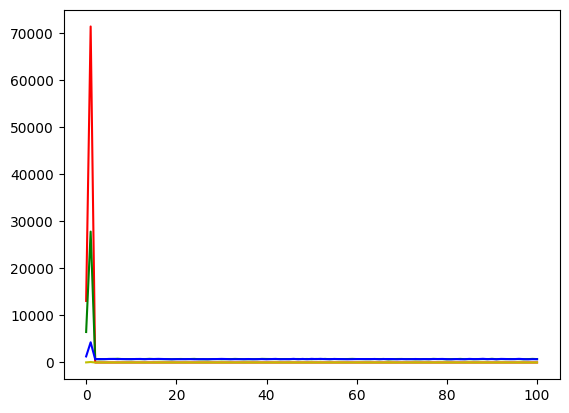

In [95]:
import matplotlib.pyplot as plt

plt.plot(range(len(gd_lr.cost_history)), gd_lr.cost_history, c= "r")
plt.plot(range(len(bgd_lr.cost_history)), bgd_lr.cost_history, c= "y")
plt.plot(range(len(sgd_lr.cost_history)), sgd_lr.cost_history, c= "g")
plt.plot(range(len(msgd_lr.cost_history)), msgd_lr.cost_history, c= "b")

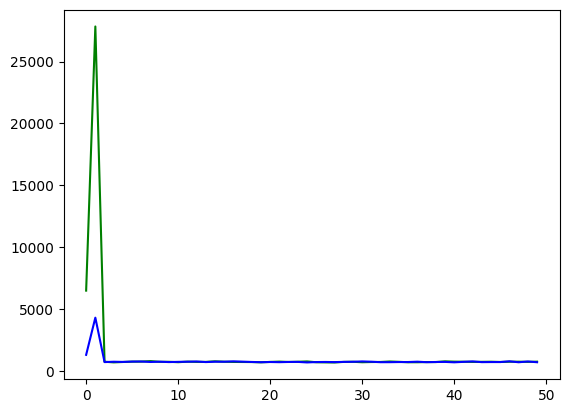

In [96]:
plt.plot(range(50), sgd_lr.cost_history[:50], c= "g")
plt.plot(range(50), msgd_lr.cost_history[:50], c= "b")

- 데이터를 좀 더 잘라서 50에포크까지만 보면 sgd_lr, msgd_lr의 두 가지 SGD의 경우 cost값이 매우 진폭이 큰 것을 볼 수 있음
    - SGD 계열 알고리즘의 전형적인 특성
        - 데이터의 일부를 셔플해서 넣기 때문에 수렴 시 cost 값이 계속 변화하며 수렴됨

- 선형회귀의 경우 데이터도 많지 않고, 알고리즘의 복잡도도 떨어지기 때문에 SGD의 효과가 적음
    - 하지만 딥러닝과 같은 복잡한 알고리즘일 수록 SGD를 사용하지 않으면 학습이 잘 이뤄지지 않는 문제가 있음